<a href="https://colab.research.google.com/github/sm160388/capstone-2/blob/main/4th_commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First, we import required libraries:**

In [1]:
#importing libraries for data handelling
import numpy as np
import pandas as pd
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')


# **Reading the data**

In [2]:
#Loading the csv data to pandas dataframe
df= pd.read_csv("/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv")

In [3]:
#print the dataset
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


The dataset has Opening, Highest, Lowest and Closing Prices of the stock in every month.

# **Data PreProcessing**

In [4]:
#first 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


Here, we see that the data is available from July 2005 to Nov 2020

In [6]:
#shape of data
df.shape

(185, 5)

In [7]:
#Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
#summary of dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**Missing values**

In [9]:
#looking for missing values
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

---No missing values in dataset

**Duplicate Rows**

In [10]:
#looking for duplicates in dataset
len(df[df.duplicated()])

0

**Data type change:-**

In [11]:
#importing datetime
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [12]:
#lets look at dataset after date format change
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Format and data type of date feature changed into datetime.

**Data preprocessing finished**. Dataset is clean and ready for exploratory data analysis.

# **Exploratory Data Analysis**

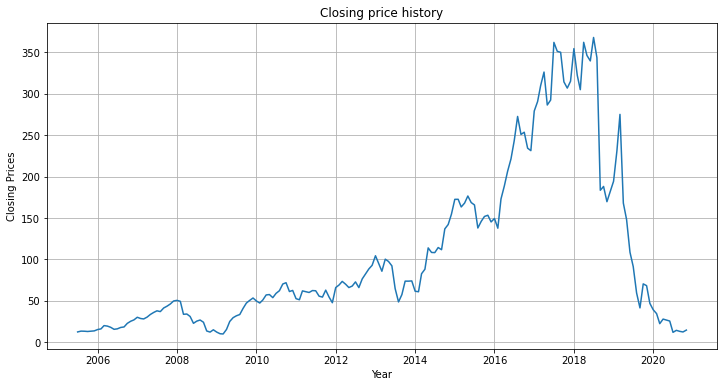

In [14]:
#plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Closing Prices')
plt.plot(df['Date'], df['Close'])
plt.title('Closing price history')
plt.show()

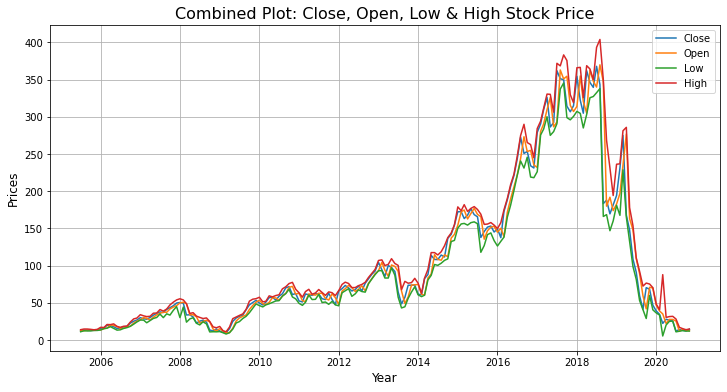

In [15]:
# Combined Line Plot for all features with respect to date.
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Prices', fontsize=12)
plt.grid()

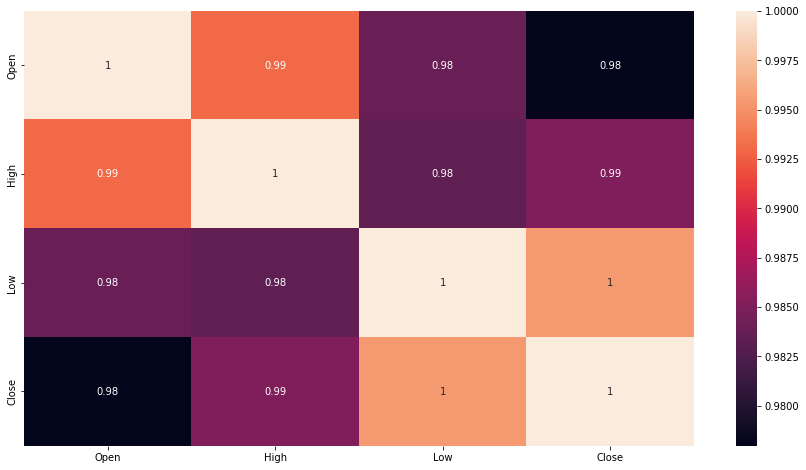

In [16]:
# plotting correlation plot
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [17]:
#make a list of independant numerical variables
numerical_features = list(set(df.describe().columns) - {'Close'})
numerical_features

['Open', 'Low', 'High']

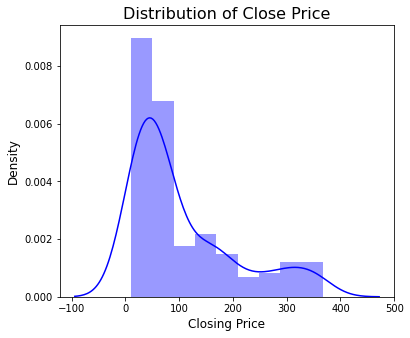

In [18]:
#distribution plot of Close price to look for normal distribution
plt.figure(figsize=(6,5))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


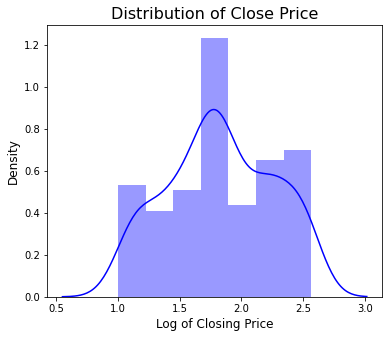

In [19]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

<function matplotlib.pyplot.show>

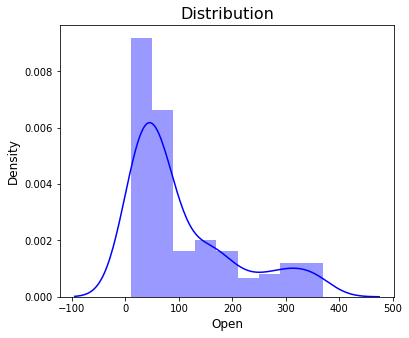

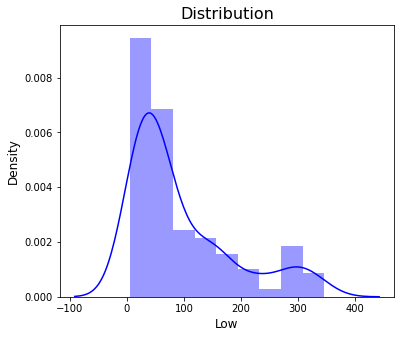

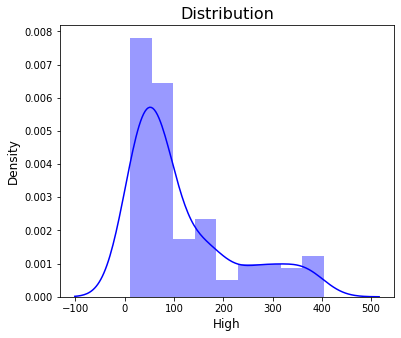

In [20]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(df[col], color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

All numerical features distribution are right skewed.

--Apply log transformation to make them normally distributed

<function matplotlib.pyplot.show>

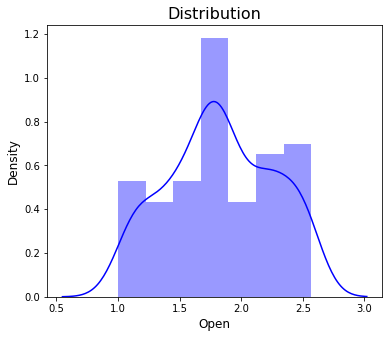

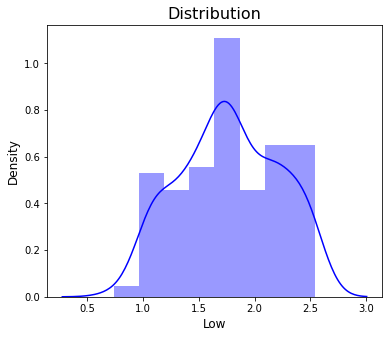

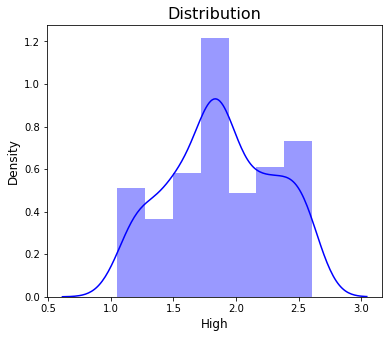

In [21]:
#Plotting distribution for each of numerical features by applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df[col]), color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

# **Transforming and splitting data**

In [22]:
#Since the Date column cannont be used in our Model so we will convert it as index and drop the column
df.index= df['Date']
df.drop('Date', axis= 1, inplace= True)

In [23]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [24]:
# Splitting our data into Dependent and Independent Variables
X = df[['Open', 'High', 'Low']]
y = df['Close']

Normalisation

In [25]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

**Train (80%) and Test (20%) Split**

In [26]:
#Splitting data into Testing and Training datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [27]:
#Checking shape of training dataset
X_train.shape

(148, 3)

In [28]:
#Checking shape of testing dataset
X_test.shape

(37, 3)

In [29]:
#data transformation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**1. Linear Regression**

In [30]:
#fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [31]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.815

In [32]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.823

In [33]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)

Evaluation metrices of Linear Regression

In [34]:
# Test Performance of linear regression model
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


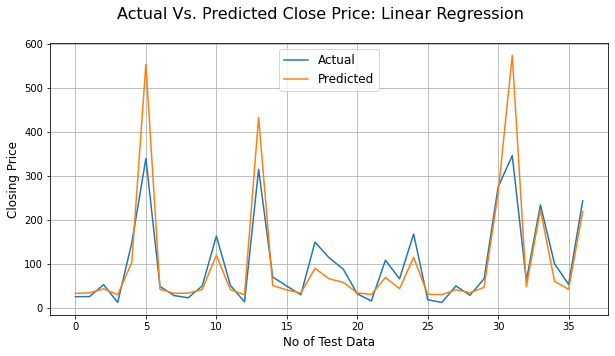

In [35]:
# Actual Price vs. Predicted Price for Linear Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


2. Lasso Regression

In [36]:
#fitting data into Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005,max_iter=3000)
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [37]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,y_train),3)

0.813

In [38]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)

Evaluation Metrics of Lasso Regression:-

In [39]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 0.033
RMSE : 0.181
MAE : 0.153
MAPE : 0.098
R2 : 0.817


Lasso Regression: Actual Vs. Predicted

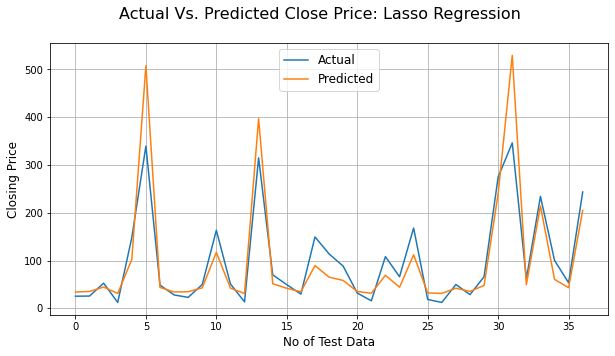

In [40]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()


# **Cross Validation on Lasso Regression**

In [41]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [42]:
# Hyper-Parameter Tuning for Lasso Regression

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)

In [43]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
print("The best fit alpha value is found out to be :" ,round(lasso_model_cv.best_params_['alpha'], 3))
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,3))

The best fit alpha value is found out to be : 0.001
The negative mean squared error for is:  -0.035


In [45]:
#prediction of test data.
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

Evaluation Metrics of Lasso Regression after Validation:



In [46]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 3))

MSE : 0.032
RMSE : 0.179
MAE : 0.152
MAPE : 0.096
R2 : 0.82


**Lasso Regression After Validation: Actual Vs. Predicted**

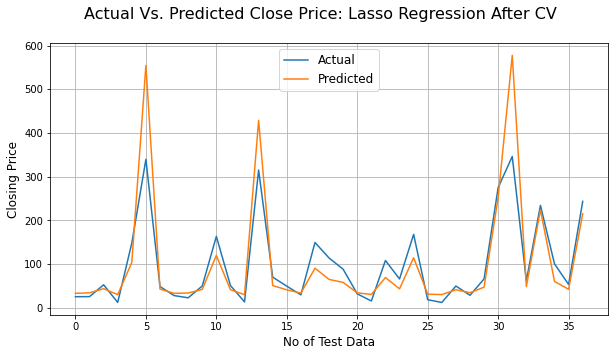

In [47]:
# Actual Price vs. Predicted Price for Lasso Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()
